In [15]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [16]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [17]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

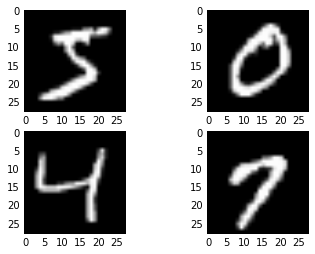

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[15].reshape(28,28), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [65]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [67]:
# create model
model = Sequential()
model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=500)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s - loss: 0.3750 - acc: 0.8941 - val_loss: 0.1342 - val_acc: 0.9618
Epoch 2/10
60000/60000 [==============================] - 39s - loss: 0.1121 - acc: 0.9676 - val_loss: 0.0782 - val_acc: 0.9765
Epoch 3/10
60000/60000 [==============================] - 39s - loss: 0.0740 - acc: 0.9782 - val_loss: 0.0566 - val_acc: 0.9812
Epoch 4/10
60000/60000 [==============================] - 39s - loss: 0.0581 - acc: 0.9825 - val_loss: 0.0580 - val_acc: 0.9816
Epoch 5/10
60000/60000 [==============================] - 39s - loss: 0.0497 - acc: 0.9853 - val_loss: 0.0466 - val_acc: 0.9844
Epoch 6/10
60000/60000 [==============================] - 40s - loss: 0.0418 - acc: 0.9870 - val_loss: 0.0441 - val_acc: 0.9843
Epoch 7/10
60000/60000 [==============================] - 40s - loss: 0.0355 - acc: 0.9895 - val_loss: 0.0443 - val_acc: 0.9850
Epoch 8/10
60000/60000 [==============================

In [196]:
model.predict_classes(test)

1/1 [==============================] - 0s


array([9])

In [191]:
import cv2,sys,os

path_to_pic= "/home/ubuntu/Notebooks/pics/nine.png"
img = cv2.imread(path_to_pic)
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2.imwrite("grey.png",img)

True

In [192]:

#Resize image
resized_image = cv2.resize(img, (28, 28))
resized_image.shape

(28, 28)

In [193]:
test = resized_image.reshape(1,1,resized_image.shape[0],resized_image.shape[1])

In [194]:
test.shape

(1, 1, 28, 28)

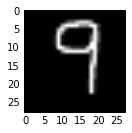

In [195]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(test.reshape(28,28), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [52]:
type(test)

numpy.ndarray

In [183]:
y_train[:20]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.